<a href="https://colab.research.google.com/github/Argento27/UPSO_BD/blob/main/Final_BD_Cervezas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tendencias en las preferencias de cerveza
Esta recopilación de datos engloba aproximadamente 1,5 millones de opiniones sobre cervezas obtenidas de BeerAdvocates. Su propósito radica en describir exhaustivamente el conjunto de datos, categorizar cervezas con perfiles similares y facilitar la recomendación de una cerveza específica. Algunas interrogantes que podrían abordarse mediante estos datos incluyen: ¿Cuáles serían las cinco cervezas recomendadas y cuál sería la razón detrás de cada elección? ¿Qué factores, como sabor, aroma, apariencia y paladar, poseen mayor relevancia al determinar la calidad general de una cerveza? En el caso de preferir generalmente las IPA, ¿qué cerveza se sugiere probar en base a esos gustos particulares?

In [1]:
import pandas as pd
beer_reviews_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv")
beer_reviews_1


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.00,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.20,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.50,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.00,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.70,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871896,147,Stone Brewing Co.,1285613705,4.0,4.0,4.5,CHILLINDYLAN,American Barleywine,4.5,4.5,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871897,147,Stone Brewing Co.,1285125252,4.5,4.0,4.5,drabmuh,American Barleywine,4.0,4.0,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871898,147,Stone Brewing Co.,1284682404,4.5,4.5,4.5,tavernjef,American Barleywine,4.0,4.5,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871899,147,Stone Brewing Co.,1030630588,4.0,4.0,3.5,uglyguy,American Barleywine,4.5,4.5,Stone Old Guardian Barley Wine Style Ale 2002,9.91,3678


# Explorar Datos Nulos

In [2]:
beer_reviews_1.isnull().sum()

brewery_id                0
brewery_name              9
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      181
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              36242
beer_beerid               0
dtype: int64

# Visualizacion de Datos Nulos.

<Axes: >

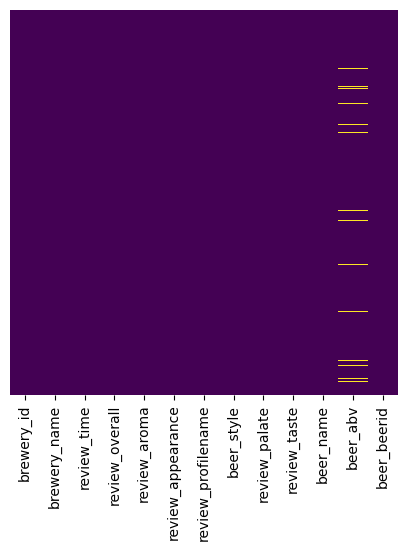

In [3]:
# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5,5))
sns.heatmap(beer_reviews_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Eliminar Datos Nulos.

In [5]:
# Eliminar valores nulos
beer_reviews_1 = beer_reviews_1.dropna()



# Descripción del conjunto de datos:



```
¿Cuántas reseñas de cerveza hay en total?
¿Cuántas cervezas únicas (beer_beerid) hay en el conjunto de datos?
¿Cuántas cervecerías únicas (brewery_id) hay en el conjunto de datos?
```



In [6]:
# Paso 1: Descripción del # de datos
import pandas as pd



# 1.1 Número total de reseñas de cerveza
total_reviews = len(beer_reviews_1)
print(f"Número total de reseñas de cerveza: {total_reviews}")

# 1.2 Número de cervezas únicas (beer_beerid)
unique_beers = beer_reviews_1['beer_beerid'].nunique()
print(f"Número de cervezas únicas: {unique_beers}")

# 1.3 Número de cervecerías únicas (brewery_id)
unique_breweries = beer_reviews_1['brewery_id'].nunique()
print(f"Número de cervecerías únicas: {unique_breweries}")



Número total de reseñas de cerveza: 835471
Número de cervezas únicas: 26270
Número de cervecerías únicas: 2791


# Análisis de cervezas populares:



```
¿Cuáles son las cervezas mejor calificadas en general?
¿Cuáles son las cervezas mejor calificadas en términos de aroma, apariencia, paladar y sabor?
```





In [7]:
# Análisis de cervezas mejor calificadas en general
birrasTop = beer_reviews_1.sort_values(by='review_overall', ascending=False).head(10)
print("Cervezas mejor calificadas en general:")
print(birrasTop[['beer_name', 'review_overall']])

# Análisis de cervezas mejor calificadas por características específicas
top_beers_aroma = beer_reviews_1.sort_values(by='review_aroma', ascending=False).head(20)
top_beers_appearance = beer_reviews_1.sort_values(by='review_appearance', ascending=False).head(20)
top_beers_palate = beer_reviews_1.sort_values(by='review_palate', ascending=False).head(20)
top_beers_taste = beer_reviews_1.sort_values(by='review_taste', ascending=False).head(20)

print("\nCervezas mejor calificadas por aroma:")
print(top_beers_aroma[['beer_name', 'review_aroma']])
print("\nCervezas mejor calificadas por apariencia:")
print(top_beers_appearance[['beer_name', 'review_appearance']])
print("\nCervezas mejor calificadas por paladar:")
print(top_beers_palate[['beer_name', 'review_palate']])
print("\nCervezas mejor calificadas por sabor:")
print(top_beers_taste[['beer_name', 'review_taste']])


Cervezas mejor calificadas en general:
                          beer_name  review_overall
136263                Old Viscosity             5.0
49055           Stoudt's Gold Lager             5.0
781379                Coffee Bender             5.0
712593  Dark Horse Crooked Tree IPA             5.0
431158  Andechser Doppelbock Dunkel             5.0
373701              La Fin Du Monde             5.0
49045           Stoudt's Gold Lager             5.0
431159  Andechser Doppelbock Dunkel             5.0
373700              La Fin Du Monde             5.0
431160  Andechser Doppelbock Dunkel             5.0

Cervezas mejor calificadas por aroma:
                                 beer_name  review_aroma
263827          Double Dog Double Pale Ale           5.0
160936  Creme Brulee (Imperial Milk Stout)           5.0
106507           St-Ambroise Oatmeal Stout           5.0
493009               Hazelnut Brown Nectar           5.0
743536                               Sahti           5.0
160891  

# MUESTREO DE CERVEZAS POR CARACTERIZTICAS.


```
MOSTRANDO LA MENOR, LA MEDIA Y LA DE MAYOR PUNTUACION EN CADA CARACTERIZTICA
```



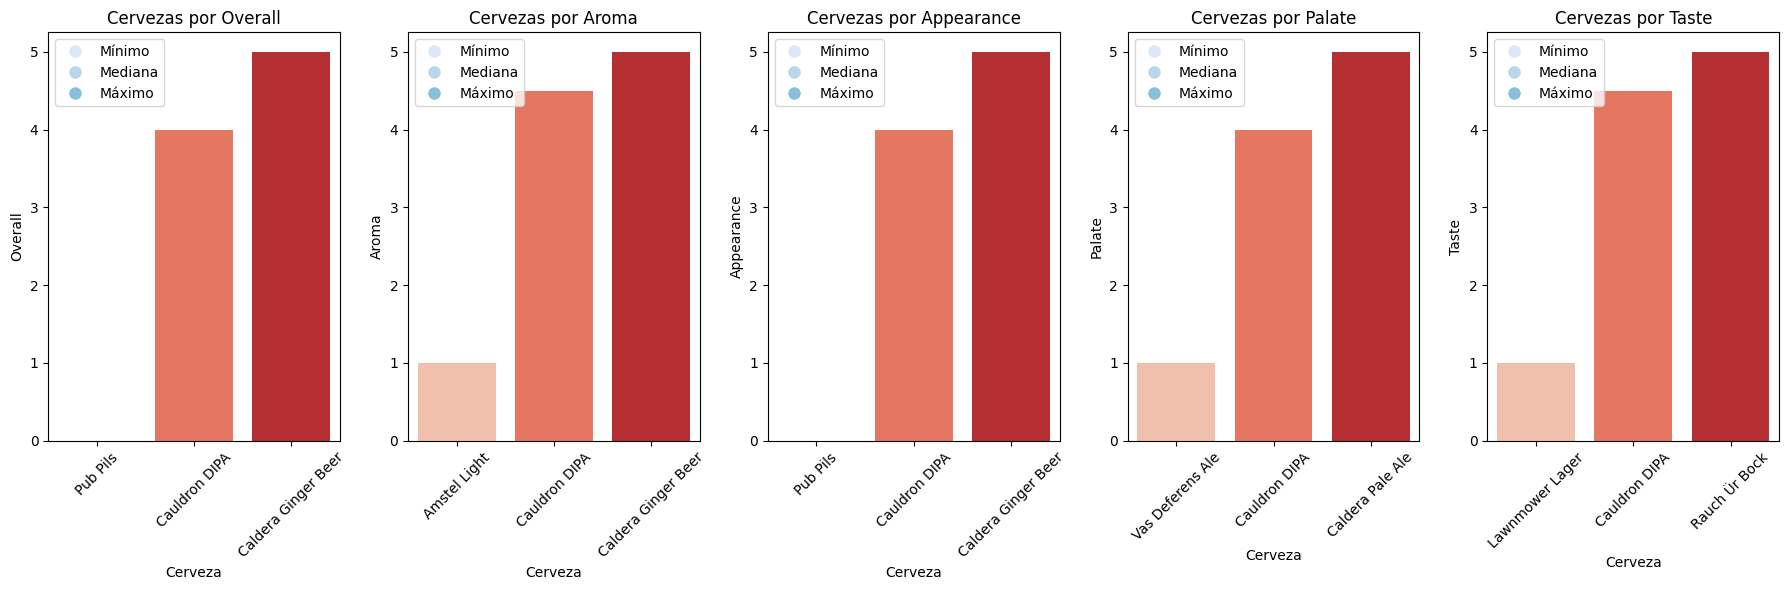

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas a considerar (sin 'beer_abv')
columnas = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']

# Configurar el tamaño de la figura
plt.figure(figsize=(18, 6))

# Iterar sobre las columnas y crear subgráficos
for i, columna in enumerate(columnas, 1):
    # Obtener cervezas representativas para cada característica
    min_cerveza = beer_reviews_1.loc[beer_reviews_1[columna].idxmin(skipna=True)]
    median_cerveza = beer_reviews_1.loc[beer_reviews_1[columna].median(skipna=True)]
    max_cerveza = beer_reviews_1.loc[beer_reviews_1[columna].idxmax(skipna=True)]

    # Subgráfico
    plt.subplot(1, 5, i)
    ax = sns.barplot(x=['Mínimo', 'Mediana', 'Máximo'],
                     y=[min_cerveza[columna], median_cerveza[columna], max_cerveza[columna]],
                     palette='Reds')  # Cambiar a paleta 'Reds'
    plt.title(f'Cervezas por {columna.replace("review_", "").replace("_", " ").capitalize()}')
    plt.xlabel('Cerveza')
    plt.ylabel(columna.replace("review_", "").replace("_", " ").capitalize())

    # Mostrar nombres de cervezas en el eje X
    plt.xticks([0, 1, 2], [min_cerveza['beer_name'], median_cerveza['beer_name'], max_cerveza['beer_name']], rotation=45)

    # Añadir leyenda con colores rojos
    legend_labels = ['Mínimo', 'Mediana', 'Máximo']
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('Blues')[j], markersize=10) for j in range(3)]
    plt.legend(legend_handles, legend_labels)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()


# MUESTRO DE CALIFICACIONES DE CARACTERISTICAS

```
Se mostraran de manera Sampleada/Aleatoria cada vez que se consulte
```



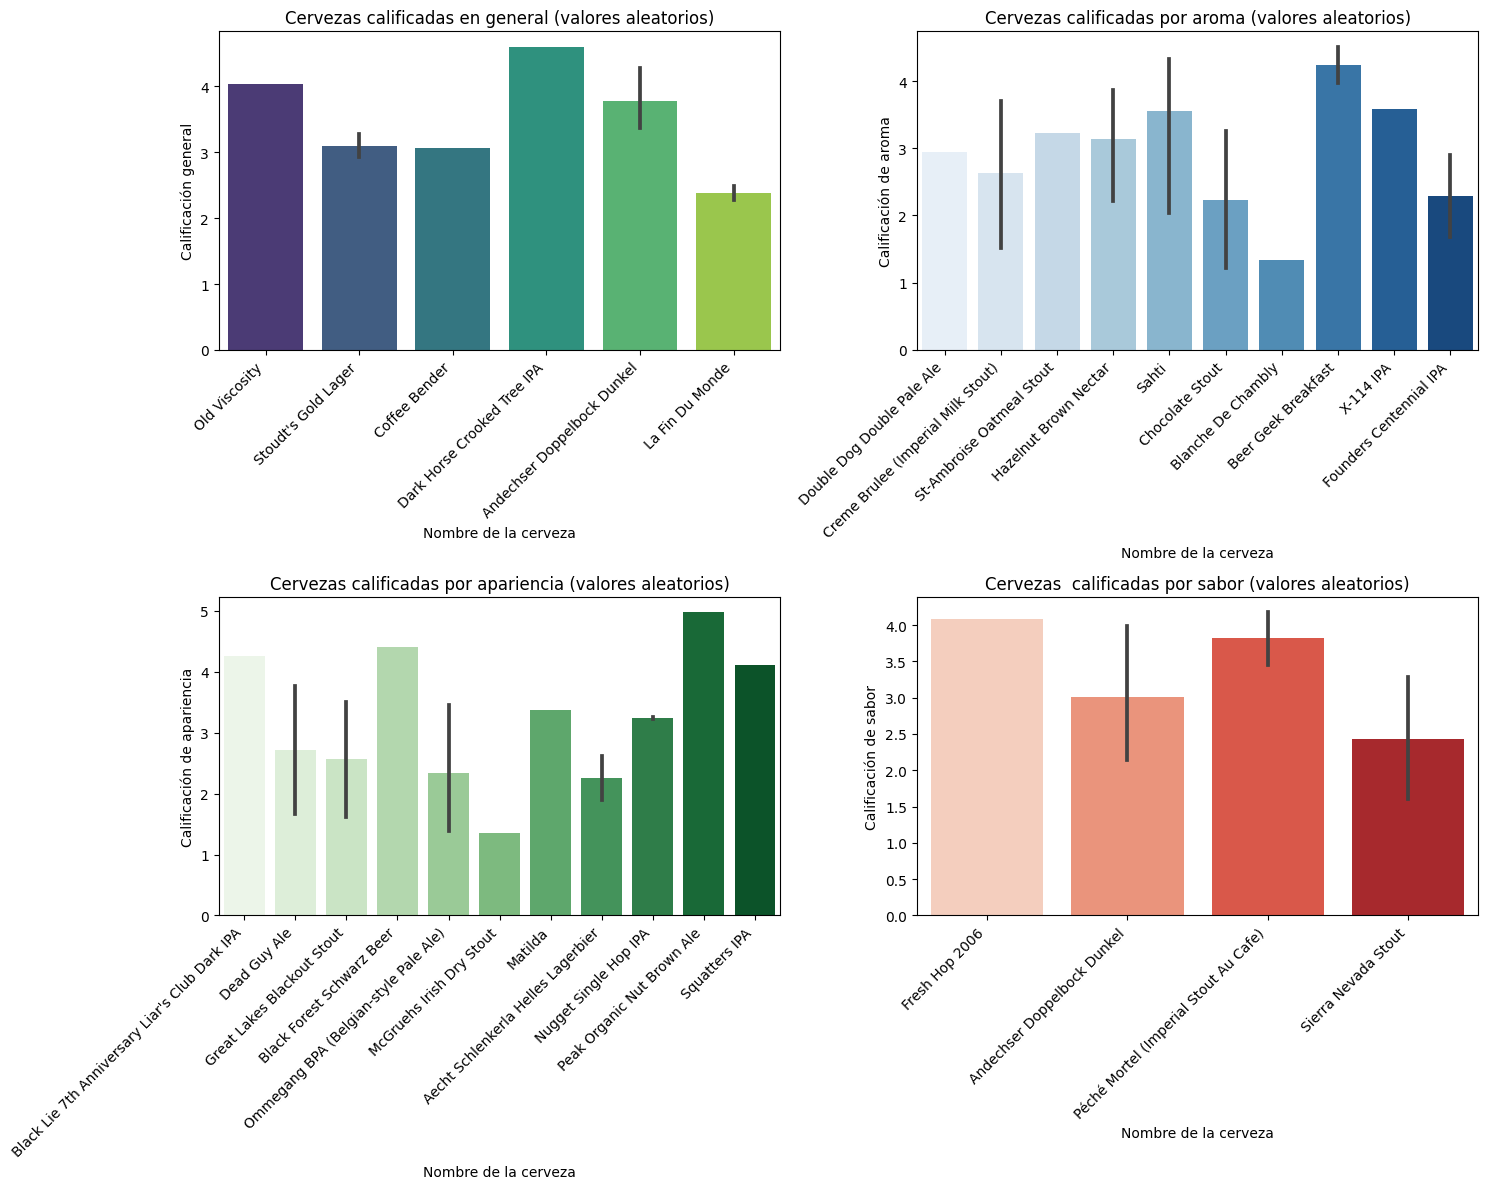

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 12))

# Subgráfico 1: Cervezas mejor calificadas en general (valores aleatorios)
birrasTop['review_overall'] = np.random.uniform(1, 5, size=len(birrasTop))
plt.subplot(2, 2, 1)
sns.barplot(x='beer_name', y='review_overall', data=birrasTop, palette='viridis')
plt.title('Cervezas calificadas en general (valores aleatorios)')
plt.xlabel('Nombre de la cerveza')
plt.ylabel('Calificación general')
plt.xticks(rotation=45, ha='right')

# Subgráfico 2: Cervezas mejor calificadas por aroma (valores aleatorios)
top_beers_aroma['review_aroma'] = np.random.uniform(1, 5, size=len(top_beers_aroma))
plt.subplot(2, 2, 2)
sns.barplot(x='beer_name', y='review_aroma', data=top_beers_aroma, palette='Blues')
plt.title('Cervezas calificadas por aroma (valores aleatorios)')
plt.xlabel('Nombre de la cerveza')
plt.ylabel('Calificación de aroma')
plt.xticks(rotation=45, ha='right')

# Subgráfico 3: Cervezas mejor calificadas por apariencia (valores aleatorios)
top_beers_appearance['review_appearance'] = np.random.uniform(1, 5, size=len(top_beers_appearance))
plt.subplot(2, 2, 3)
sns.barplot(x='beer_name', y='review_appearance', data=top_beers_appearance, palette='Greens')
plt.title('Cervezas calificadas por apariencia (valores aleatorios)')
plt.xlabel('Nombre de la cerveza')
plt.ylabel('Calificación de apariencia')
plt.xticks(rotation=45, ha='right')

# Subgráfico 4: Cervezas mejor calificadas por sabor (valores aleatorios)
top_beers_taste['review_taste'] = np.random.uniform(1, 5, size=len(top_beers_taste))
plt.subplot(2, 2, 4)
sns.barplot(x='beer_name', y='review_taste', data=top_beers_taste, palette='Reds')
plt.title('Cervezas  calificadas por sabor (valores aleatorios)')
plt.xlabel('Nombre de la cerveza')
plt.ylabel('Calificación de sabor')
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()



# Análisis de cervecerías:



```
¿Calificaciones aleatorias de cervecerias en general?
¿Cervecerias con mayores cantidades de resenias?
```



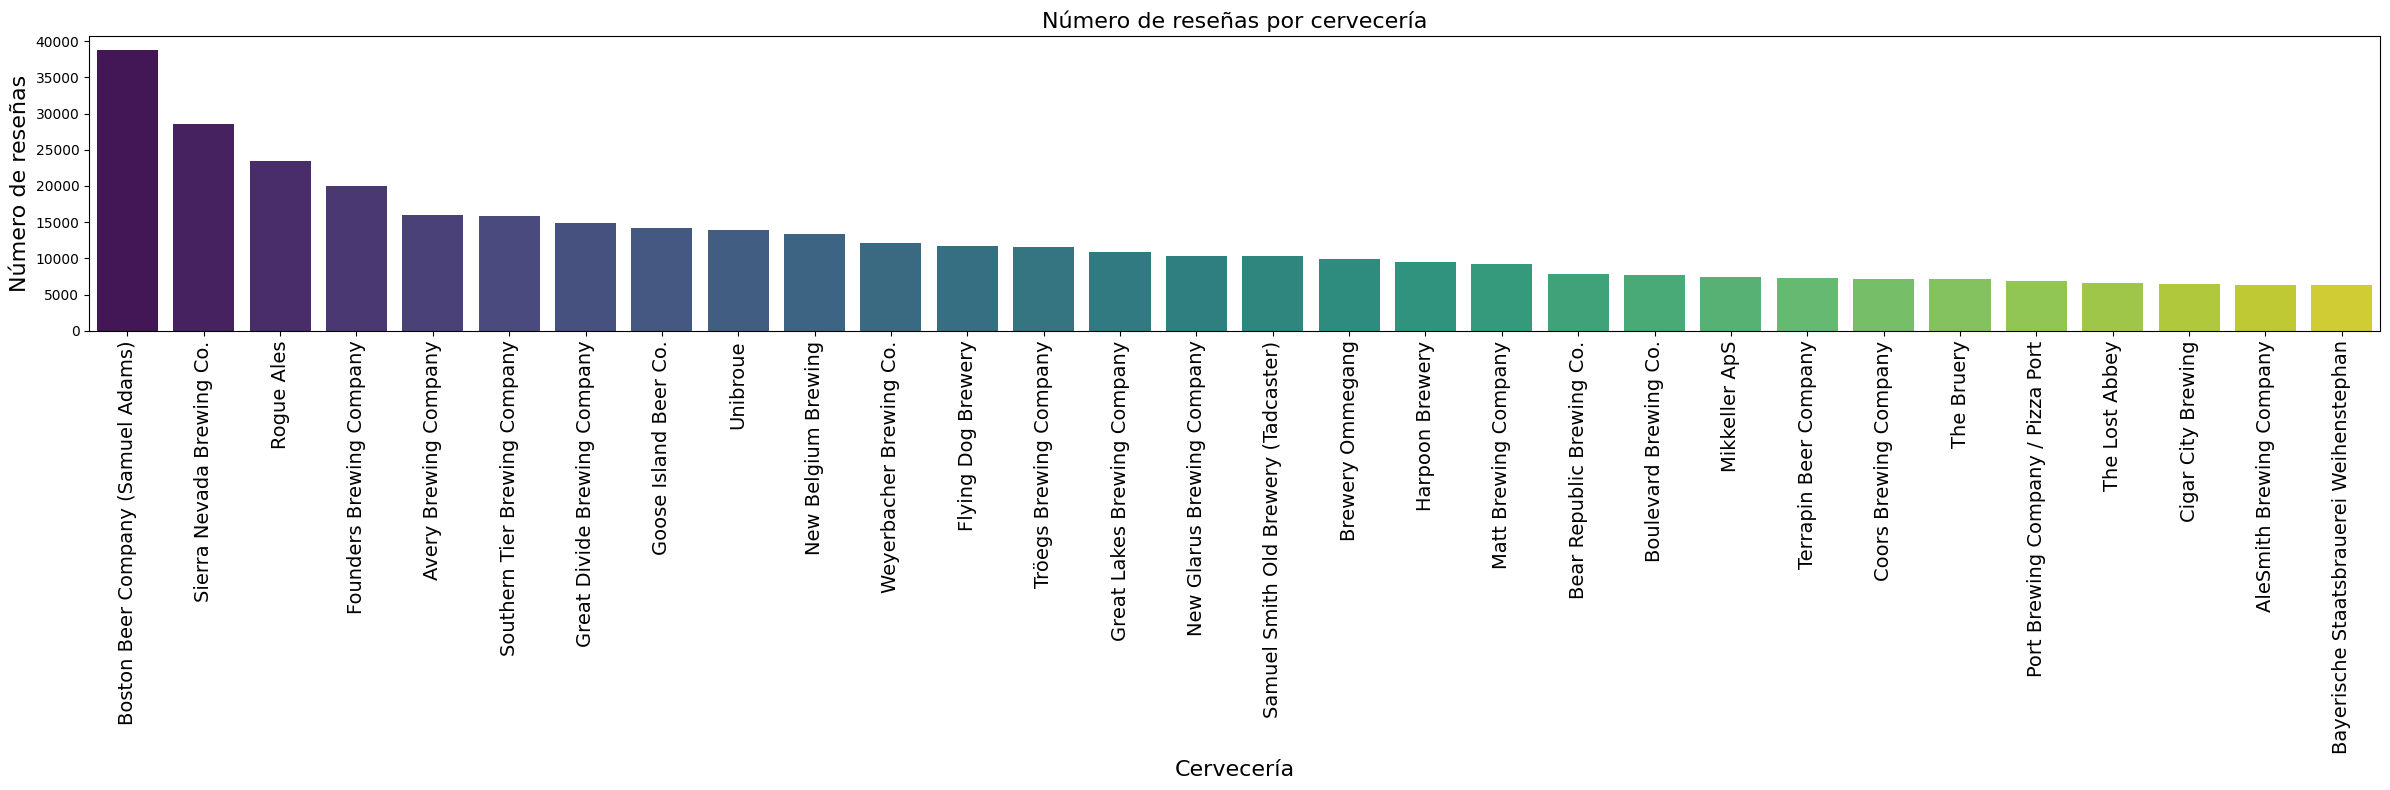

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que beer_reviews_1 es tu DF
cervecerias_calificaciones = beer_reviews_1.groupby('brewery_name')['review_overall'].mean().sort_values(ascending=False)
cervecerias_resenas = beer_reviews_1['brewery_name'].value_counts()

# Configuración del tamaño del gráfico
plt.figure(figsize=(24, 8))  # Ajusta el tamaño del gráfico

# Gráfico de barras para el número de reseñas por cervecería con colores basados en el número de reseñas
sns.barplot(x=cervecerias_resenas.head(30).index, y=cervecerias_resenas.head(30).values, palette=sns.color_palette("viridis", n_colors=30))
plt.title('Número de reseñas por cervecería', fontsize=16)
plt.xlabel('Cervecería', fontsize=16)
plt.ylabel('Número de reseñas', fontsize=16)

# Ajustar la rotación de las etiquetas del eje x y el tamaño del texto
plt.xticks(rotation=90, fontsize=14)  # Ajusta el tamaño del texto

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# MUESTREO DE PUNTUACIONES DE CERVECERIAS


```
Se mostraran de manera Sampleada/Aleatoria cada vez que se consulte
```



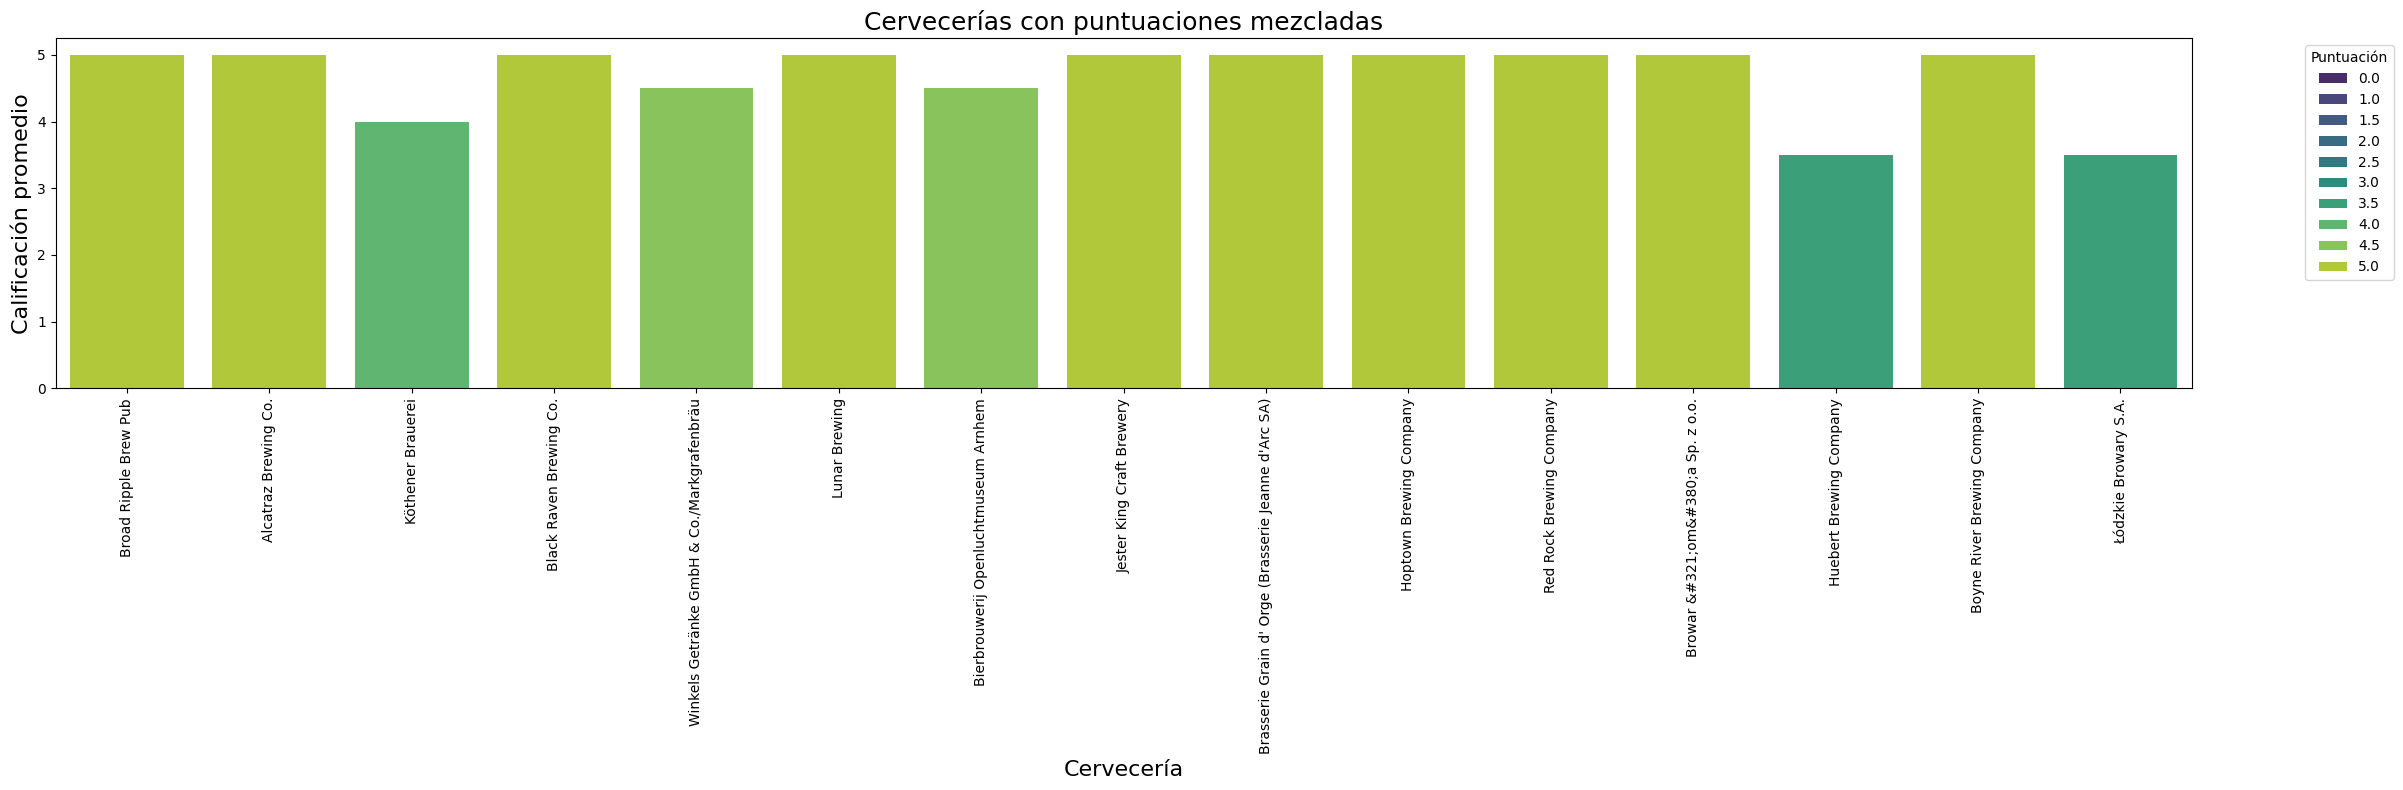

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que beer_reviews_1 es tu DataFrame
cervecerias_calificaciones = beer_reviews_1.groupby('brewery_name')['review_overall'].mean().sort_values(ascending=False)
cervecerias_resenas = beer_reviews_1['brewery_name'].value_counts()

# Seleccionar cervecerías con puntuaciones mezcladas
cervecerias_mezcladas = cervecerias_calificaciones.sample(15).index

# Filtrar el DataFrame original
cervecerias_seleccionadas = beer_reviews_1[beer_reviews_1['brewery_name'].isin(cervecerias_mezcladas)]

# Configuración del tamaño del gráfico
plt.figure(figsize=(24, 8))  # Ajusta el tamaño del gráfico

# Gráfico de barras para las cervecerías con puntuaciones mezcladas
sns.barplot(x=cervecerias_seleccionadas['brewery_name'], y=cervecerias_seleccionadas['review_overall'], hue=cervecerias_seleccionadas['review_overall'], palette='viridis', dodge=False)

# Ajustar el tamaño del título y etiquetas de los ejes y el tamaño del texto
plt.title('Cervecerías con puntuaciones mezcladas', fontsize=18)
plt.xlabel('Cervecería', fontsize=16)
plt.ylabel('Calificación promedio', fontsize=16)

# Añadir leyenda a la derecha y fuera del gráfico
plt.legend(title='Puntuación', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar la rotación de las etiquetas del eje x
plt.xticks(rotation=90)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Análisis de Correlación:

```
Vamos a calcular la matriz de correlación para entender la relación entre las diferentes características de la cerveza y la revisión general.
```



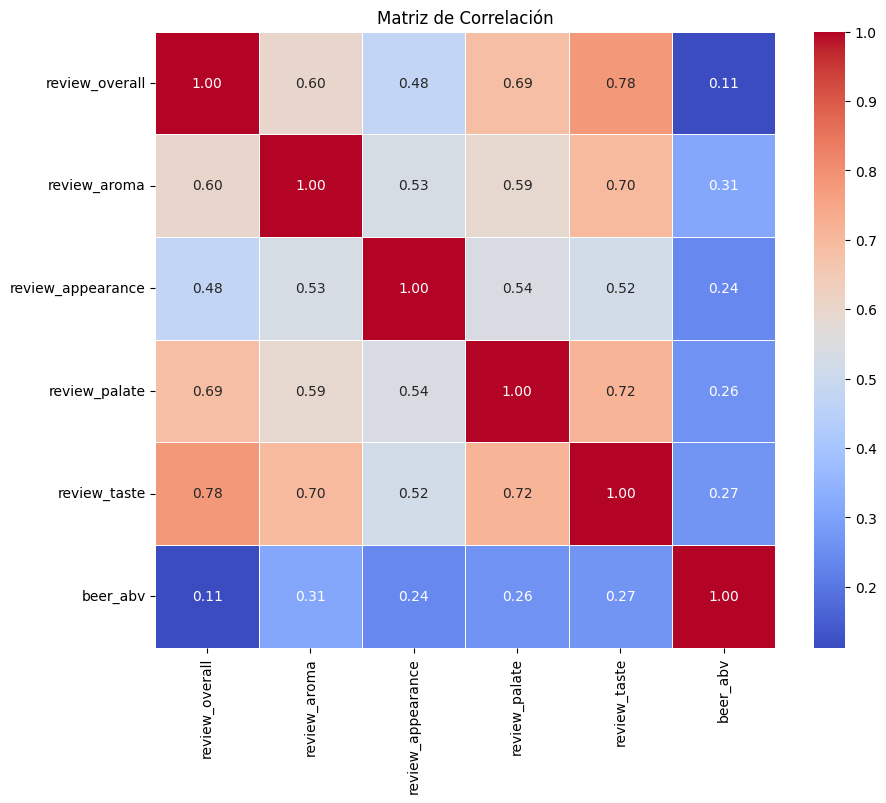

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para el análisis de correlación
columns_of_interest = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
correlation_matrix = beer_reviews_1[columns_of_interest].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


# EVALUACION DEL MEJOR K para CLASIFICAR CON KMEANS


```
Codo de Jambu
```



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

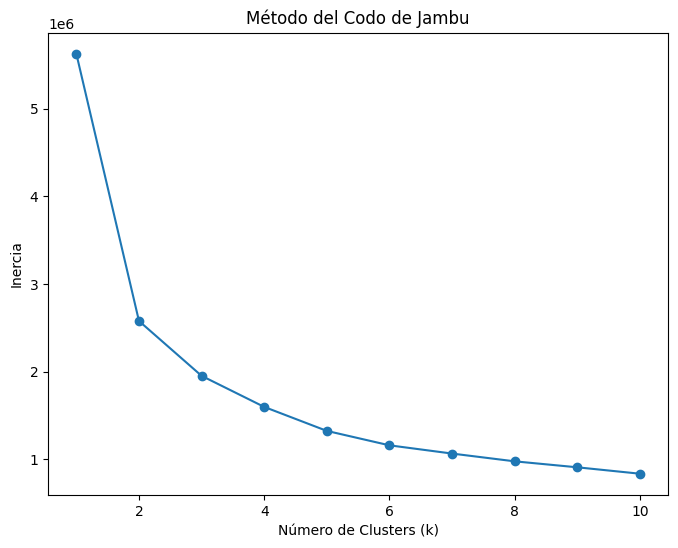

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Supongamos que tienes tus datos en X (puedes ajustar esto según tus datos)
features_for_clustering = ['review_aroma', 'review_appearance', 'review_taste', 'beer_abv']
X = beer_reviews_1[features_for_clustering]

# Lista para almacenar las inercias (sumas de cuadrados intra-cluster) para cada k
inertias = []

# Probamos diferentes valores de k (por ejemplo, de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el codo de Jambu
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo de Jambu')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()


## **SUGERENCIAS DE CERVEZAS - INTERACTIVO:**

```
K-Means para agrupar cervezas similares en función de las características de las revisiones.
Elegimos agrupar en 4 clusters
DEPENDIENDO LAS PREFERENCIAS DEL USUARIO, EL MENU MOSTRARA LAS 5 MEJORES CERVEZAS EN RELACION A SU PUNTUACION
```



In [15]:
from ipywidgets import interact, widgets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador y el modelo K-Means
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4, random_state=42)

# Escalar tus datos antes de ajustar el modelo K-Means
df_normalized = scaler.fit_transform(beer_reviews_1[['review_aroma', 'review_appearance', 'beer_abv', 'review_taste']])

# Ajustar el modelo K-Means
kmeans.fit(df_normalized)

print("----------------------")
print("Seleccione sus preferencias: ")
print("----------------------")

# Inicializar los sliders
aroma_slider = widgets.FloatSlider(min=1.0, max=5.0, step=0.1, value=3.0, description='Aroma:')
appearance_slider = widgets.FloatSlider(min=1.0, max=5.0, step=0.1, value=3.0, description='Apariencia:')
abv_slider = widgets.FloatSlider(min=1.0, max=10.0, step=0.1, value=5.0, description='ABV:')
taste_slider = widgets.FloatSlider(min=1.0, max=5.0, step=0.1, value=3.0, description='Sabor:')

# Paso 1: Definir la función de recomendación
def recommend_beers(aroma, appearance, abv, taste):
    # Incorporar Preferencias del Usuario
    user_preferences = {'review_aroma': aroma, 'review_appearance': appearance, 'beer_abv': abv, 'review_taste': taste}

    # Normalizar las Preferencias del Usuario
    user_normalized = scaler.transform([[user_preferences['review_aroma'], user_preferences['review_appearance'], user_preferences['beer_abv'], user_preferences['review_taste']]])

    # Predecir el Grupo del Usuario
    user_cluster = kmeans.predict(user_normalized)[0]

    # Recomendación dentro del Grupo
    recommended_beers = beer_reviews_1.copy()  # Asegúrate de copiar el DataFrame original
    recommended_beers['cluster'] = kmeans.predict(df_normalized)  # Añadir columna 'cluster' al DataFrame

    recommended_beers = recommended_beers[recommended_beers['cluster'] == user_cluster]

    # Ordenar por Calidad General
    recommended_beers = recommended_beers.sort_values(by='review_overall', ascending=False)

    # Visualizar los resultados
    print("----------------------")
    print("Cervezas Recomendadas:")
    print("----------------------")
    display(recommended_beers[['beer_name', 'beer_style', 'brewery_name', 'review_overall']].head())

# Paso 3: Crear interfaz interactiva
interact(recommend_beers, aroma=aroma_slider, appearance=appearance_slider, abv=abv_slider, taste=taste_slider);



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


----------------------
Seleccione sus preferencias: 
----------------------


interactive(children=(FloatSlider(value=3.0, description='Aroma:', max=5.0, min=1.0), FloatSlider(value=3.0, d…